# Image Compression using k-means clustering

Image compression is a type of data compression applied to digital images without degrading the quality of the image to an unacceptable level. The reduction in file size allows more images to be stored in a given amount of disk or memory space. It also reduces the time required for images to be sent over the Internet or downloaded from web pages.

### What is K-Means Clustering?

K-Means algorithm is a centroid based clustering technique. This technique cluster the dataset into k different clusters. Each cluster in the k-means clustering algorithm is represented by its centroid point.

### How can K-Means Clustering technique be used to compress an image?

K-means clustering will group similar colors together into ‘k’ clusters (say k=64) of different colors (RGB values). Therefore, each cluster centroid is the representative of the color vector in RGB color space of its respective cluster. Now, these ‘k’ cluster centroids will replace all the color vectors in their respective clusters. 

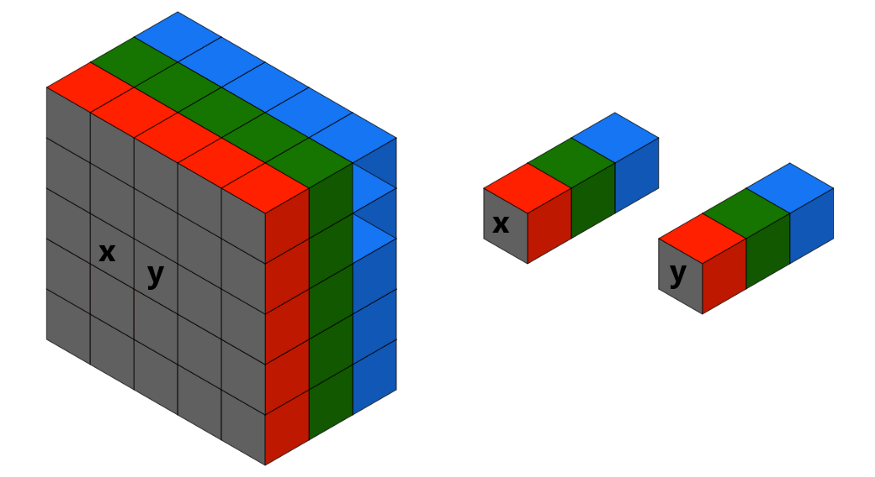

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

import cv2
from skimage import io

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

## Approach to the problem

1. Read the image
2. Reshape the image: (rows, cols, 3) --> (rows * cols, 3)
3. Clustering and find the k-centroid points
4. Replace each pixel with its cluster centroid points
5. Reshape Compressed Image


## Implement k-means clustering

In [2]:
# Create the k-means Class
class kMeansClustering:
    
    def __init__(self, k, tol=0.001, max_iter=100):
        
        # initialize the parameters
        self.k = k
        self.tol = tol    # percentage change in the centroids
        self.max_iter = max_iter    # total iterations
        
    def fit(self, data):   
        
        # Set rows and columns
        self.rows = data.shape[0]
        self.cols = data.shape[1]
        
        # Initialize the centroids
        self.centroids = {}
        
        # Assign the first k entries in our dataset as the centroids
        # can also be randomized for a little more optimisation
        no_duplicate_data = (pd.DataFrame(data).drop_duplicates()).values    # Create no duplicate data
        for i in range(self.k):

            self.centroids[i] = no_duplicate_data[i]
        
        # Optimize in each operation 
        for _ in range(self.max_iter):
            print("Iteration: ", _+1)
            
            # Intialize a classification dictionary
            self.classifications = {}
            
            # Add lists for each class
            for i in range(self.k):
                self.classifications[i] = []
            
            # Initialize the labels for each row 
            self.labels = []
            
            for row in data:
                # Calculate the distance from each centroid
                distances = [np.linalg.norm(row - self.centroids[centroid]) for centroid in self.centroids]
                
                # Classify the row in that cluster where the distance is the minimum
                classification = distances.index(min(distances))
                self.classifications[classification].append(row)
                
                # Add to the labels
                self.labels.append(classification)
        
            # Save the previou centroid
            prev_centroids = dict(self.centroids)

            # Update the centroids as the average of all the points with that label
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)

            # Step to check if the centroids have been optimized
            is_optimum = True

            # iterate though the centroids
            for cen in self.centroids:

                # Collect the centroids
                original = prev_centroids[cen]
                current = self.centroids[cen]

                # Calculate the percentage change and compare with the tolerance level
                if np.sum((current-original)/original*100.0) > self.tol:
                    print("Percentage Change in the Centroid:", np.sum((current-original)/original*100.0))
                    is_optimum = False
            
            if is_optimum:
                break

## Read the image and apply the algorithm

In [3]:
# Read the image
image = cv2.imread('input_image.jpg')

# Convert image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image.shape

(3056, 4592, 3)

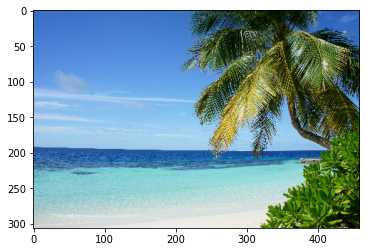

In [4]:
# Resize the images to not explode the image dimensionality
# I have resized them in the same ratio as the original image by dividing the dimensions by 10 
image = cv2.resize(image, (459, 306))
plt.imshow(image)
plt.show()

In [5]:
# Scale the image for faster calculations 
image = image/255

In [6]:
# Reshape the image 
rows = image.shape[0]
cols = image.shape[1]
dims = image.shape[2]
print("Number of rows:", rows)
print("Number of cols:", cols)

print("Image Dimensions before reshaping:", image.shape)

# Flatten the image
flat_image = image.reshape(rows*cols, 3)

print("Image Dimensions after reshaping:", flat_image.shape)

Number of rows: 306
Number of cols: 459
Image Dimensions before reshaping: (306, 459, 3)
Image Dimensions after reshaping: (140454, 3)


## Outputs with varied k values

I will test with k-values = 2, 3, 4, 5, 6. 

I have also plotted the centroid positions for each cluster, however, plotting all the points was taking a lot of time so I have avoided it in the notebook. 

### k = 2

Iteration:  1
Percentage Change in the Centroid: 225.5744604457167
Iteration:  2


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


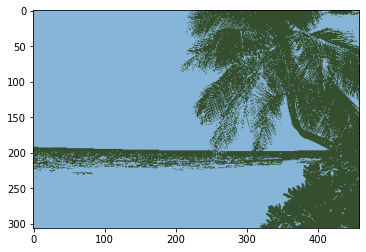

In [7]:
# Set the k value 
k = 2

# Create a copy of the image 
test_image = flat_image.copy()

# Intialize and fit the model
model = kMeansClustering(k)
model.fit(test_image)

# Collect the labels
label_array = np.array(model.labels)

# Collect the centroid array
cluster_centers = np.zeros((model.k, model.cols))
for i in range(k):
    cluster_centers[i] = model.centroids[i]

# Replace each pixel value with its nearby centroid
compressed_image = cluster_centers[model.labels]

# Reshape the image to original dimension
compressed_image = compressed_image.reshape(rows, cols, 3)

# Save the image
file_path = 'clustered_image_k' + str(k) + '.jpg'
io.imsave(file_path, compressed_image)

# Display the image
plt.imshow(compressed_image)
plt.show()

In [8]:
# See the different centroid values for each cluster
model.centroids

{0: array([0.53187982, 0.71182525, 0.84553272]),
 1: array([0.206807  , 0.30754715, 0.1810087 ])}

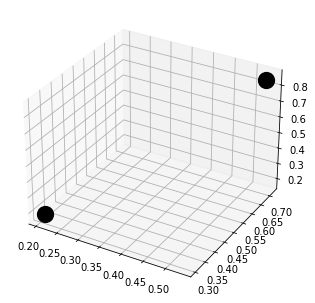

<Figure size 720x504 with 0 Axes>

In [9]:
# Plot the centroids 

fig3d = plt.figure()
plt.figure(figsize=(10, 7))
ax = Axes3D(fig3d)


for c in model.centroids:
    
    # Collect the points
    x = model.centroids[c][0]
    y = model.centroids[c][1]
    z = model.centroids[c][2]
    
    # make the plot
    ax.scatter(x, y, z, marker="o", color="k", s=150, linewidths=5)

plt.show()

### k = 3 

Iteration:  1
Percentage Change in the Centroid: 233.92148786173863
Percentage Change in the Centroid: 18.35997028707915
Iteration:  2
Percentage Change in the Centroid: 20.36964662409216
Percentage Change in the Centroid: 13.273002769283188
Iteration:  3
Percentage Change in the Centroid: 3.726980809875369
Percentage Change in the Centroid: 9.413009235202797
Iteration:  4
Percentage Change in the Centroid: 1.0393232276754316
Percentage Change in the Centroid: 3.3035618345776085
Iteration:  5
Percentage Change in the Centroid: 0.3581972258097993
Percentage Change in the Centroid: 1.1752594190457997
Iteration:  6
Percentage Change in the Centroid: 0.11939496078038418
Percentage Change in the Centroid: 0.4040944133450786
Iteration:  7
Percentage Change in the Centroid: 0.020162857167350313
Percentage Change in the Centroid: 0.005392293080388601
Percentage Change in the Centroid: 0.05708856795385233
Iteration:  8
Percentage Change in the Centroid: 0.007163239302323726
Percentage Change in

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


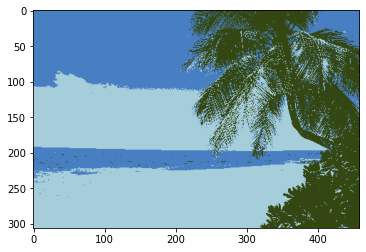

In [10]:
# Set the k value 
k = 3

# Create a copy of the image 
test_image = flat_image.copy()

# Intialize and fit the model
model = kMeansClustering(k)
model.fit(test_image)

# Collect the labels
label_array = np.array(model.labels)

# Collect the centroid array
cluster_centers = np.zeros((model.k, model.cols))
for i in range(k):
    cluster_centers[i] = model.centroids[i]

# Replace each pixel value with its nearby centroid
compressed_image = cluster_centers[model.labels]

# Reshape the image to original dimension
compressed_image = compressed_image.reshape(rows, cols, 3)

# Save the image
file_path = 'clustered_image_k' + str(k) + '.jpg'
io.imsave(file_path, compressed_image)

# Display the image
plt.imshow(compressed_image)
plt.show()

In [11]:
# See the different centroid values for each cluster
model.centroids

{0: array([0.64809451, 0.80635257, 0.85627424]),
 1: array([0.20611514, 0.28157201, 0.07773863]),
 2: array([0.28472673, 0.49961453, 0.76102428])}

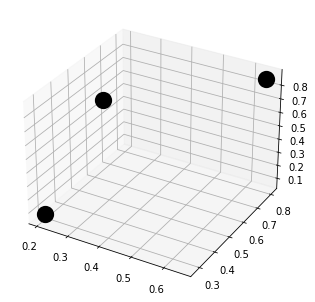

<Figure size 720x504 with 0 Axes>

In [12]:
# Plot the centroids 

fig3d = plt.figure()
plt.figure(figsize=(10, 7))
ax = Axes3D(fig3d)


for c in model.centroids:
    
    # Collect the points
    x = model.centroids[c][0]
    y = model.centroids[c][1]
    z = model.centroids[c][2]
    
    # make the plot
    ax.scatter(x, y, z, marker="o", color="k", s=150, linewidths=5)

plt.show()

### k = 4

Iteration:  1
Percentage Change in the Centroid: 233.92148786173863
Percentage Change in the Centroid: 54.13218692915123
Percentage Change in the Centroid: 19.348242301926
Iteration:  2
Percentage Change in the Centroid: 22.137863608153914
Percentage Change in the Centroid: 11.38339390120718
Iteration:  3
Percentage Change in the Centroid: 4.044301630015706
Percentage Change in the Centroid: 8.797745367383538
Iteration:  4
Percentage Change in the Centroid: 1.0016884836196638
Percentage Change in the Centroid: 3.0426622310916867
Percentage Change in the Centroid: 0.5314958998955706
Iteration:  5
Percentage Change in the Centroid: 0.33934099669783124
Percentage Change in the Centroid: 1.137854224270661
Percentage Change in the Centroid: 0.409559983526502
Iteration:  6
Percentage Change in the Centroid: 0.13864507134901402
Percentage Change in the Centroid: 0.48119467688575507
Iteration:  7
Percentage Change in the Centroid: 0.019648603249320426
Percentage Change in the Centroid: 0.08774

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


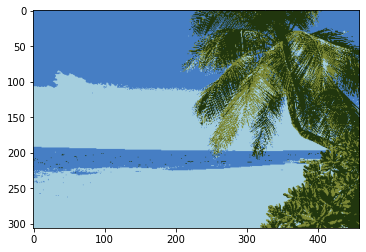

Wall time: 1min 11s


In [13]:
%%time
# Set the k value 
k = 4

# Create a copy of the image 
test_image = flat_image.copy()

# Intialize and fit the model
model = kMeansClustering(k)
model.fit(test_image)

# Collect the labels
label_array = np.array(model.labels)

# Collect the centroid array
cluster_centers = np.zeros((model.k, model.cols))
for i in range(k):
    cluster_centers[i] = model.centroids[i]

# Replace each pixel value with its nearby centroid
compressed_image = cluster_centers[model.labels]

# Reshape the image to original dimension
compressed_image = compressed_image.reshape(rows, cols, 3)

# Save the image
file_path = 'clustered_image_k' + str(k) + '.jpg'
io.imsave(file_path, compressed_image)

# Display the image
plt.imshow(compressed_image)
plt.show()

In [14]:
# See the different centroid values for each cluster
model.centroids

{0: array([0.64535239, 0.81023068, 0.87391044]),
 1: array([0.49074126, 0.53889137, 0.21354614]),
 2: array([0.27809763, 0.4973418 , 0.77241856]),
 3: array([0.13151325, 0.21205115, 0.05508361])}

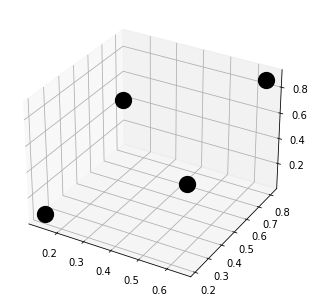

<Figure size 720x504 with 0 Axes>

In [15]:
# Plot the centroids 

fig3d = plt.figure()
plt.figure(figsize=(10, 7))
ax = Axes3D(fig3d)

# Iterate through the centroids
for c in model.centroids:
    
    # Collect the points
    x = model.centroids[c][0]
    y = model.centroids[c][1]
    z = model.centroids[c][2]
    
    # make the plot
    ax.scatter(x, y, z, marker="o", color="k", s=150, linewidths=5)

plt.show()

### k = 5

Iteration:  1
Percentage Change in the Centroid: 0.8677529367184631
Percentage Change in the Centroid: 40.233325799508336
Percentage Change in the Centroid: 220.25898317590992
Iteration:  2
Percentage Change in the Centroid: 47.85626595841633
Percentage Change in the Centroid: 23.690487513335164
Iteration:  3
Percentage Change in the Centroid: 22.329366518289415
Percentage Change in the Centroid: 0.06274431784079049
Percentage Change in the Centroid: 7.333786404614485
Iteration:  4
Percentage Change in the Centroid: 7.027481621520683
Percentage Change in the Centroid: 1.187653181059566
Percentage Change in the Centroid: 2.785227079922597
Percentage Change in the Centroid: 2.1578722693720054
Iteration:  5
Percentage Change in the Centroid: 2.9007757728581502
Percentage Change in the Centroid: 0.842615790021494
Percentage Change in the Centroid: 3.2499328445244533
Percentage Change in the Centroid: 0.9333009798251442
Percentage Change in the Centroid: 0.6393658243617821
Iteration:  6
Per

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


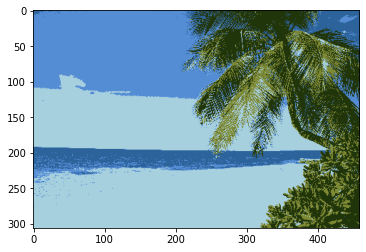

Wall time: 2min 1s


In [16]:
%%time

# Set the k value 
k = 5

# Create a copy of the image 
test_image = flat_image.copy()

# Intialize and fit the model
model = kMeansClustering(k)
model.fit(test_image)

# Collect the labels
label_array = np.array(model.labels)

# Collect the centroid array
cluster_centers = np.zeros((model.k, model.cols))
for i in range(k):
    cluster_centers[i] = model.centroids[i]

# Replace each pixel value with its nearby centroid
compressed_image = cluster_centers[model.labels]

# Reshape the image to original dimension
compressed_image = compressed_image.reshape(rows, cols, 3)

# Save the image
file_path = 'clustered_image_k' + str(k) + '.jpg'
io.imsave(file_path, compressed_image)

# Display the image
plt.imshow(compressed_image)
plt.show()

In [17]:
# See the different centroid values for each cluster
model.centroids

{0: array([0.33497514, 0.55637373, 0.83887927]),
 1: array([0.49818379, 0.54361436, 0.20764651]),
 2: array([0.17605615, 0.38842373, 0.61024355]),
 3: array([0.13212472, 0.2103997 , 0.04590471]),
 4: array([0.65559538, 0.81659921, 0.8734525 ])}

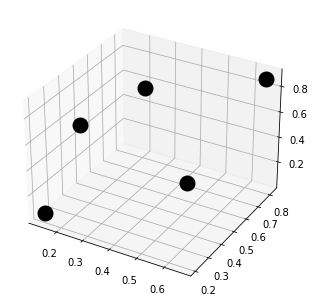

<Figure size 720x504 with 0 Axes>

In [18]:
# Plot the centroids 

fig3d = plt.figure()
plt.figure(figsize=(10, 7))
ax = Axes3D(fig3d)

# Iterate thorugh the centroids
for c in model.centroids:
    
    # Collect the points
    x = model.centroids[c][0]
    y = model.centroids[c][1]
    z = model.centroids[c][2]
    
    # make the plot
    ax.scatter(x, y, z, marker="o", color="k", s=120, linewidths=5)

plt.show()

### k = 6

Iteration:  1
Percentage Change in the Centroid: 8.66415361307837
Percentage Change in the Centroid: 4.712215997564464
Percentage Change in the Centroid: 211.63439861656622
Iteration:  2
Percentage Change in the Centroid: 9.335059460335767
Percentage Change in the Centroid: 51.8856303367973
Percentage Change in the Centroid: 27.212395169453814
Iteration:  3
Percentage Change in the Centroid: 11.777324115398443
Percentage Change in the Centroid: 6.078588075569236
Percentage Change in the Centroid: 19.743460744025246
Percentage Change in the Centroid: 7.562498223960482
Iteration:  4
Percentage Change in the Centroid: 4.295725207893035
Percentage Change in the Centroid: 5.360826463754287
Percentage Change in the Centroid: 12.523887921175659
Percentage Change in the Centroid: 1.9438689737325294
Iteration:  5
Percentage Change in the Centroid: 4.886363042317373
Percentage Change in the Centroid: 4.760582955206907
Percentage Change in the Centroid: 1.5076266827378277
Percentage Change in the

Percentage Change in the Centroid: 0.003775125191694586
Percentage Change in the Centroid: 0.01913986287948344
Percentage Change in the Centroid: 0.03401240954360298
Iteration:  32
Percentage Change in the Centroid: 0.014665414377653016
Iteration:  33
Percentage Change in the Centroid: 0.0033742348911323106
Percentage Change in the Centroid: 0.027870475367344806
Iteration:  34
Percentage Change in the Centroid: 0.002665706513798196
Percentage Change in the Centroid: 0.01648640052304294
Iteration:  35
Percentage Change in the Centroid: 0.001108130448949035
Percentage Change in the Centroid: 0.009153606190234125
Iteration:  36
Percentage Change in the Centroid: 0.0012439755251470845
Percentage Change in the Centroid: 0.0085885866839182
Iteration:  37


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


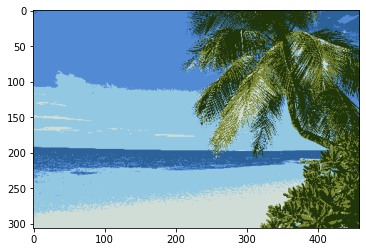

In [19]:
# Set the k value 
k = 6

# Create a copy of the image 
test_image = flat_image.copy()

# Intialize and fit the model
model = kMeansClustering(k)
model.fit(test_image)

# Collect the labels
label_array = np.array(model.labels)

# Collect the centroid array
cluster_centers = np.zeros((model.k, model.cols))
for i in range(k):
    cluster_centers[i] = model.centroids[i]

# Replace each pixel value with its nearby centroid
compressed_image = cluster_centers[model.labels]

# Reshape the image to original dimension
compressed_image = compressed_image.reshape(rows, cols, 3)

# Save the image
file_path = 'clustered_image_k' + str(k) + '.jpg'
io.imsave(file_path, compressed_image)

# Display the image
plt.imshow(compressed_image)
plt.show()

In [20]:
# See the different centroid values for each cluster
model.centroids

{0: array([0.32194124, 0.54149521, 0.83307696]),
 1: array([0.4892769 , 0.5374719 , 0.20119411]),
 2: array([0.17284792, 0.38496778, 0.60340131]),
 3: array([0.13061888, 0.20849259, 0.04519929]),
 4: array([0.57519531, 0.78676675, 0.88412368]),
 5: array([0.8190713 , 0.86822784, 0.8433494 ])}

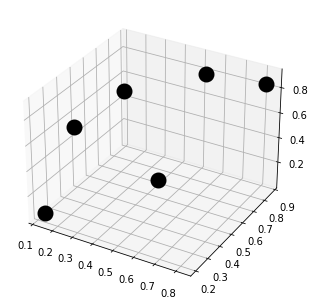

<Figure size 720x504 with 0 Axes>

In [21]:
# Plot the centroids 

fig3d = plt.figure()
plt.figure(figsize=(10, 7))
ax = Axes3D(fig3d)


for c in model.centroids:
    
    # Collect the points
    x = model.centroids[c][0]
    y = model.centroids[c][1]
    z = model.centroids[c][2]
    
    # make the plot
    ax.scatter(x, y, z, marker="o", color="k", s=120, linewidths=5)

plt.show()

## Conclusion 

We can see that the quality of images increased by increasing the number of clusters. We can also see an increased depth in each image after increasing the number of clusters. This is understandable because the degree of variation in color increases. We can also see that all the clusters are formed very distinctly. Hence, the algorithm works **perfectly**.